## Exponential Solutions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline 
from scipy.optimize import curve_fit
import os

Directory housekeeping

In [20]:
basedir = '/home/david/gh/intro_curve_fitting_python'

try:
    os.chdir(basedir)
except:
    print('\n\nproblem changing to the directory you specified; does it exist?\nthe kernel will now restart; rerun this program.\n\n')
    quit()

In the '.../intro_curve_fitting_python/exponential_data' directory you will find the following files:

In [21]:
filenames = os.listdir(basedir+'/exponential_data/')
filenames

['exponential2.csv', 'exponential3.csv', 'exponential1.csv']

It should not be too difficult to adapt your work from the linear fitting exercises to these data sets.<br><br>To get you started, I will define an appropriate fitting function. Note, however, that you will have to customize it to fit data set 3. If you get stuck with that, check out the [notebook](./generate_datasets.ipynb) with which I created the data, or view it as a [webpage](./generate_datasets.html).

In [22]:
def genexpfunc(x, a, k, c):
    return c+a*np.exp(k*x)

Read and scatter plot exponential1.csv

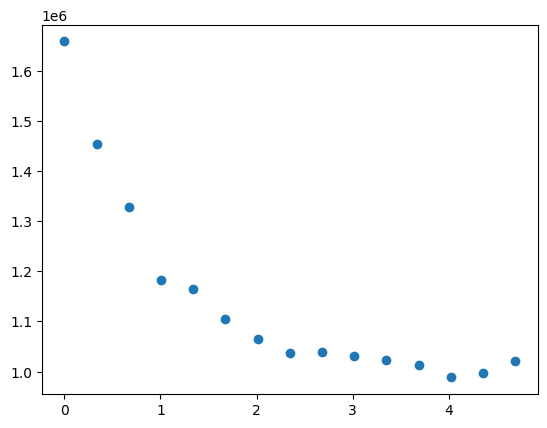

In [23]:
# dataset linear1.csv
fn = basedir+'/exponential_data/exponential1.csv'

x = []
y = []

inf = open(fn)

for line in inf:
    line = line.rstrip()
    la = line.split(',')
    x.append(float(la[0]))
    y.append(float(la[1]))

inf.close()

x=np.array(x)
y=np.array(y)

plt.scatter(x,y)
plt.show()

Attempt the curve fit

In [24]:
popt, pcov = curve_fit(genexpfunc, x, y)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Very well, try a few more function calls:

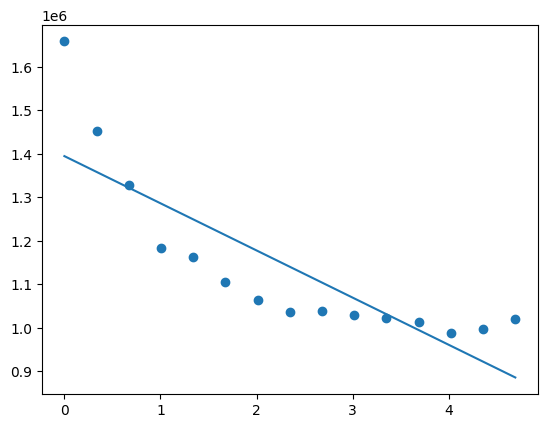

In [29]:
popt, pcov = curve_fit(genexpfunc, x, y, maxfev=100000)

plt.scatter(x,y)
plt.plot(x,genexpfunc(x,*popt))
plt.show()

Houston, we've had a problem:<br><br>The curve_fit routine has run without errors, but the fit is plainly wrong. The result is more or less linear whereas the data set clearly has the shape of an ordinary exponential decay. As a consequence, the residuals describe a curve, not a random scattering about the zero line. Additionally, the R$^2$ value is poor.<br><br>This is an example of a curve-fitting exercise which succeeded in finding a 'local,' rather than the 'global,' minimum of the minimization function. To fix this, it is necessary to specify better starting parameters for the fit routine, of which the most important is the decay constant, as the $a$ parameter in the function may be estimated as the y-value of the first data point.<br><br><font size="5">On estimating k</font><br><br>No doubt you are familiar with the idea 'after 10 half-lives, a radioactive substance has, for all intents and purposes, decayed away. Let's make that idea a bit more precise, and introduce the concept of the <i>lifetime</i> of a process, because this will greatly simplify the ensuing arithmetic. Whereas the <i>the half-life</i> of a process is the length of time $t_{\frac{1}{2}}$ it takes so that half of the material present at time $t=0$ has vanished, the <i>lifetime</i> of a process is the length of time $\tau$ it takes so that $\frac{1}{e}$ of the starting material remains. Therefore, if:
$$y(t)=A_0e^{kt}$$then:
$$y(\tau)=A_0e^{k\tau}$$and:
$$y(\tau)=\frac{A_0}{e}$$Setting these last two equal to each other and solving for $\tau$ provides:

$$\frac{A_0}{e}=A_0e^{k\tau}$$
$$\frac{1}{e}=e^{k\tau}$$
Taking logarithms:
$$-1=k\tau$$
$$\tau=-\frac{1}{k}$$
Therefore, if you can eyeball the number of lifetimes $n$ described by the extent of decay you see in your data, you can estimate k as:

$$k=-\frac{n}{(t_{max})}$$
in which $t_{max}$ is the largest value of the independent variable in the data.<br><br>
To get a feel for how much decay goes with an arbitrary number of lifetimes, here are decays for one, three, five, and seven lifetimes.

In [ ]:
fig = plt.figure()

fig.set_figwidth=(8)
fig.set_figheight(8)

spec = gridspec.GridSpec(ncols=1, nrows=4,
						hspace=0.3)  # height_ratios=[4, 1], width_ratios=[], hspace=??

t = np.linspace(0,1, 15)

n = [1, 3, 5, 7] # lifetimes

for i in range(4): 
    if i==0:
        why=np.exp(-n[i]*t)
    else:
        why = np.vstack((why,np.exp(-n[i]*t)))

ax0 = fig.add_subplot(spec[0])
ax0.scatter(t,why[0], marker='.')
ax0.set_title('One lifetime:')
ax0.set_ylim([0, 1.1])
ax0.set_xticks([])

ax1 = fig.add_subplot(spec[1])
ax1.scatter(t,why[1], marker='.')
ax1.set_title('Three lifetimes:')
ax1.set_ylim([0, 1.1])
ax1.set_xticks([])

ax2 = fig.add_subplot(spec[2])
ax2.scatter(t,why[2], marker='.')
ax2.set_title('Five lifetimes:')
ax2.set_ylim([0, 1.1])
ax2.set_xticks([])

ax3 = fig.add_subplot(spec[3])
ax3.scatter(t,why[3], marker='.')
ax3.set_title('Seven lifetimes:')
ax3.set_ylim([0, 1.1])

plt.show()

In light of the above, I'd estimate from the original first scatter plot that between 3 and 5 lifetimes have passed over the course of the time during which data was recorded (simulated). Applying:
$$k=-\frac{n}{(t_{max})}$$
and estimating $n=4$ suggests the following starting value for k:
$$k=-\frac{4}{5}$$

and estimating $a_0=1600000$:

In [ ]:
k=np.float64(-4/5)
a=np.float64(1600000)
p=np.array([a,k])
popt, pcov = curve_fit(genexpfunc, x, y, p0=p)
popt

In [ ]:
residuals = y-genexpfunc(x, *popt)

rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit to exponential decay function; a=%0.3f, k=%0.3f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential1.csv data with fit; Rsquared=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()

In [ ]:
x

In [ ]:
a=1600000
k=-4/5
p=np.array([a, k])
eks=np.linspace(0,5,15)
why=genexpfunc(eks, *p)

plt.scatter(x,y)
plt.plot(eks,why)
plt.show()